# Notebook #1: Exploring GC Content in the Human Genome

# Part I: Load the data

In [54]:
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [55]:
Whole_Genome = pickle.load(open("output_whole_genome_human.p", "rb"))
CDS_Genome = pickle.load(open("output_coding_genome_human.p", "rb"))

# Part II: Create DataFrames from our dictionaries

In [56]:
# Whole Genome:
df = pd.DataFrame(Whole_Genome)
df

,1,10,11,12,13,14,15,16,17,18,...,22,3,4,5,6,7,8,9,X,Y
length_all,2.489564e+08,1.337974e+08,1.350866e+08,1.332753e+08,1.143643e+08,1.070437e+08,1.019912e+08,9.033834e+07,8.325744e+07,8.037328e+07,...,5.081847e+07,1.982956e+08,1.902146e+08,1.815383e+08,1.708060e+08,1.593460e+08,1.451386e+08,1.383947e+08,1.560409e+08,5.722742e+07
length_non,2.304810e+08,1.332630e+08,1.345337e+08,1.331378e+08,9.798312e+07,9.056815e+07,8.464132e+07,8.180594e+07,8.292020e+07,8.008960e+07,...,3.915978e+07,1.981001e+08,1.897527e+08,1.812654e+08,1.700785e+08,1.589701e+08,1.447681e+08,1.217906e+08,1.548930e+08,2.641504e+07
GC_count,9.616657e+07,5.535948e+07,5.588506e+07,5.427548e+07,3.777280e+07,3.698279e+07,3.557884e+07,3.647272e+07,3.757544e+07,3.185611e+07,...,1.840684e+07,7.857774e+07,7.256800e+07,7.161127e+07,6.736002e+07,6.469684e+07,5.813396e+07,5.027047e+07,6.122152e+07,1.057268e+07
GC_content_all,3.862787e-01,4.137560e-01,4.136979e-01,4.072433e-01,3.302848e-01,3.454924e-01,3.488423e-01,4.037346e-01,4.513163e-01,3.963519e-01,...,3.622077e-01,3.962658e-01,3.815060e-01,3.944693e-01,3.943657e-01,4.060149e-01,4.005409e-01,3.632398e-01,3.923428e-01,1.847486e-01
GC_content_non,4.172429e-01,4.154154e-01,4.153981e-01,4.076639e-01,3.855031e-01,4.083421e-01,4.203484e-01,4.458444e-01,4.531519e-01,3.977558e-01,...,4.700445e-01,3.966567e-01,3.824347e-01,3.950632e-01,3.960525e-01,4.069748e-01,4.015660e-01,4.127617e-01,3.952503e-01,4.002523e-01


In [57]:
#Coding Genome:
df_cds = pd.DataFrame(CDS_Genome)
df_cds

,Y,13,21,18,20,22,X,14,10,9,...,12,17,11,6,19,3,2,1,15,8
length_all,83604.000000,562314.000000,272511.000000,417615.000000,717801.000000,611016.000000,1.134858e+06,860850.000000,1.103331e+06,1.176756e+06,...,1.482369e+06,1.605642e+06,1.706691e+06,1.463613e+06,1.849407e+06,1.625325e+06,2.057967e+06,3.008613e+06,1.015305e+06,970218.000000
length_non,83604.000000,562309.000000,272497.000000,417604.000000,717770.000000,610995.000000,1.134838e+06,860822.000000,1.103299e+06,1.176731e+06,...,1.482328e+06,1.605576e+06,1.706642e+06,1.463574e+06,1.849325e+06,1.625271e+06,2.057929e+06,3.008566e+06,1.015273e+06,970190.000000
GC_count,41675.000000,270439.000000,142638.000000,206736.000000,400274.000000,356004.000000,5.827430e+05,445470.000000,5.663130e+05,6.305000e+05,...,7.613490e+05,8.981470e+05,9.158450e+05,7.445870e+05,1.081126e+06,8.206210e+05,1.020653e+06,1.577198e+06,5.282360e+05,505846.000000
GC_content_all,0.498481,0.480939,0.523421,0.495040,0.557639,0.582643,5.134942e-01,0.517477,5.132757e-01,5.357950e-01,...,5.136029e-01,5.593694e-01,5.366203e-01,5.087322e-01,5.845798e-01,5.048966e-01,4.959521e-01,5.242276e-01,5.202732e-01,0.521374
GC_content_non,0.498481,0.480944,0.523448,0.495053,0.557663,0.582663,5.135032e-01,0.517494,5.132906e-01,5.358064e-01,...,5.136171e-01,5.593924e-01,5.366357e-01,5.087457e-01,5.846057e-01,5.049133e-01,4.959612e-01,5.242358e-01,5.202896e-01,0.521389
Methionine_count,602.000000,4083.000000,1849.000000,3098.000000,5125.000000,4505.000000,8.839000e+03,6389.000000,7.848000e+03,8.535000e+03,...,1.095400e+04,1.145300e+04,1.303100e+04,1.062500e+04,1.163400e+04,1.207000e+04,1.479800e+04,2.117500e+04,7.312000e+03,6928.000000
Methionine_percentage,0.021602,0.021783,0.020355,0.022255,0.021420,0.022119,2.336592e-02,0.022265,2.133902e-02,2.175897e-02,...,2.216857e-02,2.139892e-02,2.290573e-02,2.177830e-02,1.887200e-02,2.227862e-02,2.157177e-02,2.111438e-02,2.160533e-02,0.021422
Proline_count,1697.000000,11091.000000,5912.000000,8275.000000,15538.000000,13902.000000,2.494600e+04,17429.000000,2.287500e+04,2.559800e+04,...,2.991000e+04,3.585200e+04,3.616400e+04,3.033900e+04,4.514900e+04,3.151100e+04,4.083700e+04,6.283600e+04,2.024600e+04,20596.000000
Proline_percentage,0.060894,0.059172,0.065084,0.059445,0.064940,0.068257,6.594481e-02,0.060739,6.219802e-02,6.525907e-02,...,6.053149e-02,6.698629e-02,6.356862e-02,6.218652e-02,7.323807e-02,5.816252e-02,5.953011e-02,6.265611e-02,5.982242e-02,0.063685
Glycine_count,1775.000000,12171.000000,6153.000000,8903.000000,16623.000000,13972.000000,2.511700e+04,18355.000000,2.400000e+04,2.596600e+04,...,3.284900e+04,3.609000e+04,3.633300e+04,3.259100e+04,4.635900e+04,3.380300e+04,4.391400e+04,6.805200e+04,2.159200e+04,21538.000000


# Part III. Transpose from wide to long

In [58]:
##Transpose CDS:
CDS_Genome_Long = df_cds.transpose()

In [59]:
##transpose from wide to long. 
Whole_Genome_Long = df.transpose()
#Show the transposed df:
Whole_Genome_Long

,length_all,length_non,GC_count,GC_content_all,GC_content_non
1,248956422.0,230481012.0,96166571.0,0.386279,0.417243
10,133797422.0,133262962.0,55359481.0,0.413756,0.415415
11,135086622.0,134533742.0,55885058.0,0.413698,0.415398
12,133275309.0,133137816.0,54275482.0,0.407243,0.407664
13,114364328.0,97983125.0,37772797.0,0.330285,0.385503
14,107043718.0,90568149.0,36982791.0,0.345492,0.408342
15,101991189.0,84641325.0,35578844.0,0.348842,0.420348
16,90338345.0,81805943.0,36472718.0,0.403735,0.445844
17,83257441.0,82920204.0,37575444.0,0.451316,0.453152
18,80373285.0,80089605.0,31856106.0,0.396352,0.397756


# Part IV: Order the values based on chromosome #

In [60]:
custom_order = [str(i) for i in range(1, 23)] + ['X', 'Y']
#custom_order

In [61]:
# Reset the index and create a new column
Whole_Genome_Long.reset_index(inplace=True)
CDS_Genome_Long.reset_index(inplace=True)
# Now, rename the new first column (which was the index)
Whole_Genome_Long.rename(columns={'index': 'Chromosome'}, inplace=True)
CDS_Genome_Long.rename(columns={'index': 'Chromosome'}, inplace=True)

# Part V: Sort the DataFrames by chromosome

In [62]:
## Sort by ordered categorical column:
Whole_Genome_Long['Chromosome'] = pd.Categorical(Whole_Genome_Long['Chromosome'], categories=custom_order, ordered=True)
Whole_Genome_Long_Sorted = Whole_Genome_Long.sort_values('Chromosome')

In [63]:
## Sort by ordered categorical column:
CDS_Genome_Long['Chromosome'] = pd.Categorical(CDS_Genome_Long['Chromosome'], categories=custom_order, ordered=True)
CDS_Genome_Long_Sorted = CDS_Genome_Long.sort_values('Chromosome')

In [64]:
#Show one sorted DataFrame:
CDS_Genome_Long_Sorted

,Chromosome,length_all,length_non,GC_count,GC_content_all,GC_content_non,Methionine_count,Methionine_percentage,Proline_count,Proline_percentage,...,Isoleucine_count,Isoleucine_percentage,Asparagine_count,Asparagine_percentage,Histidine_count,Histidine_percentage,Stop_count,Stop_percentage,Unknown_count,Unknown_percentage
21,1,3008613.0,3008566.0,1577198.0,0.524228,0.524236,21175.0,0.021114,62836.0,0.062656,...,42414.0,0.042293,34573.0,0.034474,25474.0,0.025401,1985.0,0.001979,30.0,0.000030
20,2,2057967.0,2057929.0,1020653.0,0.495952,0.495961,14798.0,0.021572,40837.0,0.059530,...,32010.0,0.046663,26268.0,0.038292,17476.0,0.025476,1157.0,0.001687,28.0,0.000041
19,3,1625325.0,1625271.0,820621.0,0.504897,0.504913,12070.0,0.022279,31511.0,0.058163,...,25482.0,0.047034,20539.0,0.037911,14032.0,0.025900,1023.0,0.001888,36.0,0.000066
12,4,1144905.0,1144886.0,545749.0,0.476676,0.476684,8187.0,0.021452,21426.0,0.056143,...,18393.0,0.048195,15815.0,0.041440,10139.0,0.026567,706.0,0.001850,14.0,0.000037
13,5,1380951.0,1380936.0,695280.0,0.503479,0.503485,9678.0,0.021025,27710.0,0.060198,...,20828.0,0.045247,18189.0,0.039514,11491.0,0.024963,842.0,0.001829,10.0,0.000022
17,6,1463613.0,1463574.0,744587.0,0.508732,0.508746,10625.0,0.021778,30339.0,0.062187,...,21587.0,0.044247,17777.0,0.036438,12650.0,0.025929,1024.0,0.002099,25.0,0.000051
11,7,1344219.0,1344192.0,697467.0,0.518864,0.518875,9407.0,0.020994,28749.0,0.064161,...,19752.0,0.044082,15696.0,0.035030,11948.0,0.026665,877.0,0.001957,18.0,0.000040
23,8,970218.0,970190.0,505846.0,0.521374,0.521389,6928.0,0.021422,20596.0,0.063685,...,13641.0,0.042179,11616.0,0.035918,8541.0,0.026410,656.0,0.002028,16.0,0.000049
9,9,1176756.0,1176731.0,630500.0,0.535795,0.535806,8535.0,0.021759,25598.0,0.065259,...,16492.0,0.042044,13543.0,0.034526,10535.0,0.026858,755.0,0.001925,16.0,0.000041
8,10,1103331.0,1103299.0,566313.0,0.513276,0.513291,7848.0,0.021339,22875.0,0.062198,...,16229.0,0.044127,13906.0,0.037811,9541.0,0.025942,701.0,0.001906,22.0,0.000060


# Part VI: Calculate the average GC content across all chromosomes

In [65]:
#Create the average values using .mean()
WG_avg_gc_content_all = Whole_Genome_Long_Sorted['GC_content_all'].mean()
WG_avg_gc_content_non = Whole_Genome_Long_Sorted['GC_content_non'].mean()
Cod_avg_gc_content_all = CDS_Genome_Long_Sorted['GC_content_all'].mean()
Cod_av_gc_content_non = CDS_Genome_Long_Sorted['GC_content_non'].mean()

# Part VII: Visually compare GC content across the human genome

# Figure 1: Compare GC content averages across the DataFrames

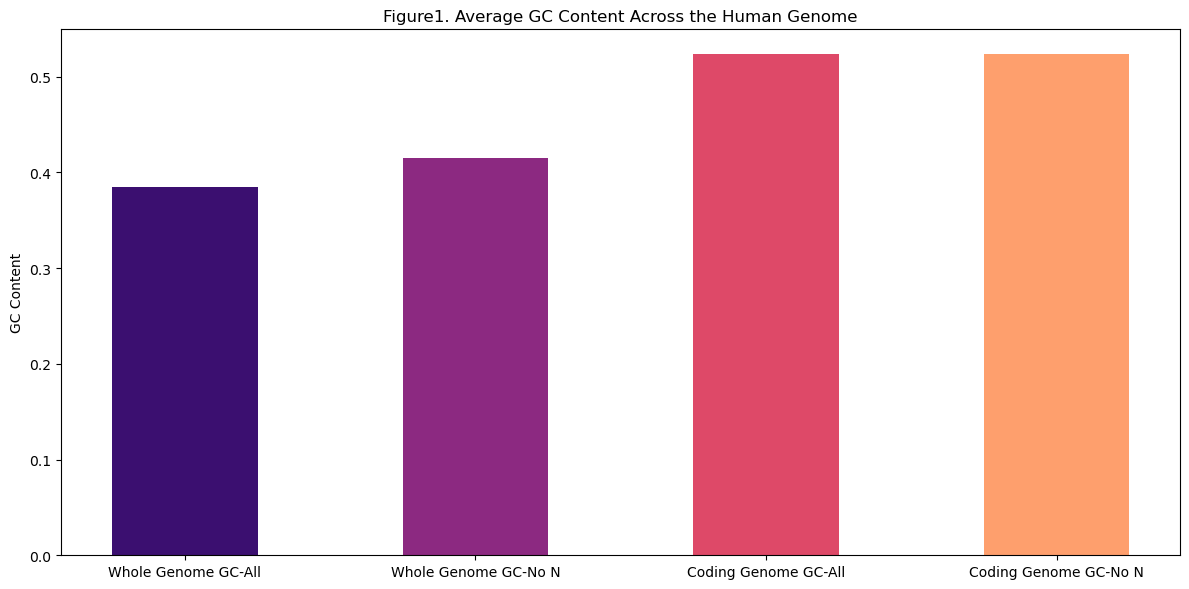

In [66]:
# Create a figure
#fig, ax = plt.subplots(figsize=(5, 5))

# Bar width
bar_width = 0.5

# X locations for the bars
x = ['Whole Genome GC-All', 'Whole Genome GC-No N', 'Coding Genome GC-All', 'Coding Genome GC-No N']

# Create the figure with a specified size:
# There is only one "subplot"
# figure is the container for all subplots
# axis is a single subplot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust width and height as needed

# Average bar heights (defined above):
average_values = [WG_avg_gc_content_all, WG_avg_gc_content_non, Cod_avg_gc_content_all, Cod_av_gc_content_non]

# Use Seaborn to create a color palette
palette = sns.color_palette("magma", n_colors=len(average_values))

# Create bar graph for average values
bars = ax.bar(x, average_values, width=bar_width, color=palette, label='Average GC Content')

# Set titles and labels:
ax.set_title('Figure1. Average GC Content Across the Human Genome')
ax.set_ylabel('GC Content')
#ax.legend()

# Show the plot:
plt.tight_layout()
plt.show()

# Figure 2. GC content for each chromosome, with and without "N"s 

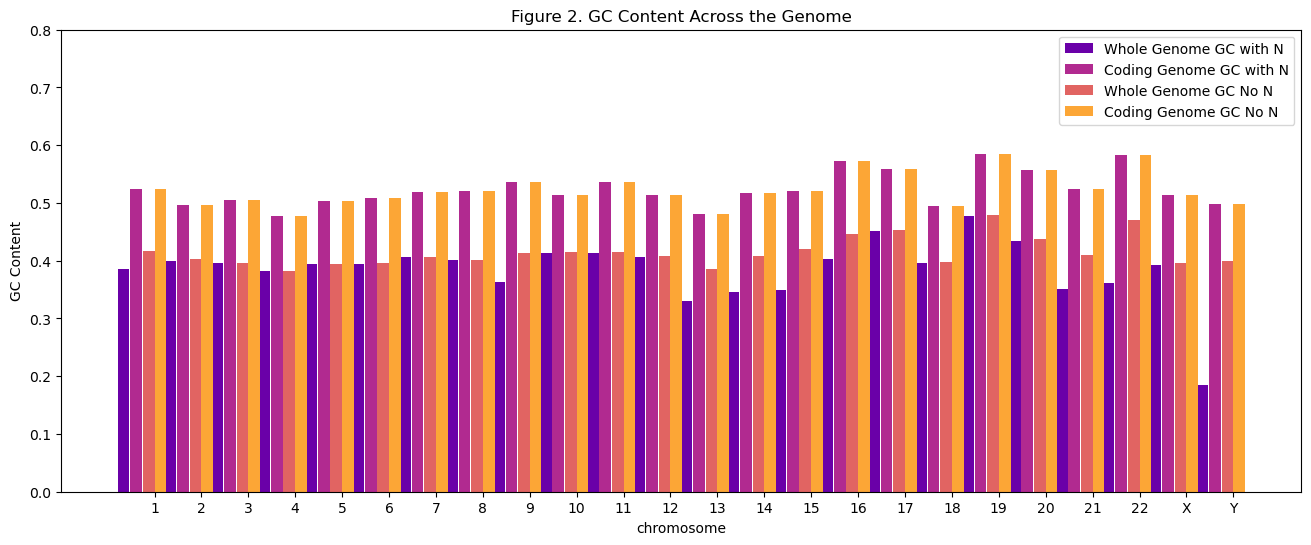

In [67]:
##Create lists of what we want to plot:
chromosome = list(Whole_Genome_Long_Sorted['Chromosome'])
whole_gc_all = list(Whole_Genome_Long_Sorted['GC_content_all'])
whole_gc_non = list(Whole_Genome_Long_Sorted['GC_content_non'])
cod_gc_all = list(CDS_Genome_Long_Sorted['GC_content_all'])
cod_gc_non = list(CDS_Genome_Long_Sorted['GC_content_non'])

xaxis = np.arange(len(chromosome))#creates an array of x values for the plot
width = 0.25 # width of the bars
spacing = 0.05 #spacing for the bars

# Create the figure with a specified size
fig, ax = plt.subplots(figsize=(16, 6))  # Adjust width and height as needed

# Set y-axis limits to provide more space
ax.set_ylim(0, 0.8)  # Adjust this range as needed

#Color palette
palette = sns.color_palette("plasma", n_colors=4)  # Adjust the palette name and number of colors

# Create the figure with a specified size
bar1 = plt.bar(xaxis - width*1.5-spacing/1.5, whole_gc_all, width, label = "Whole Genome GC with N", color=palette[0])
bar2 = plt.bar(xaxis - width/2-spacing/3, cod_gc_all, width, label = "Coding Genome GC with N", color=palette[1])
bar3 = plt.bar(xaxis + width/2, whole_gc_non, width, label = "Whole Genome GC No N", color=palette[2])
bar4 = plt.bar(xaxis + width*1.5, cod_gc_non, width, label = "Coding Genome GC No N", color=palette[3])

plt.xticks(xaxis+width, chromosome) 
plt.xlabel("chromosome") 
plt.ylabel("GC Content") 
plt.title("Figure 2. GC Content Across the Genome") 
plt.legend() 
plt.show() 

# Part VIII: Scatterplots to show how amino acid percentage relates to the GC content in a chromosome

# Figure 3. GC content in coding DNA, across all chromosomes, x 20 amino acids

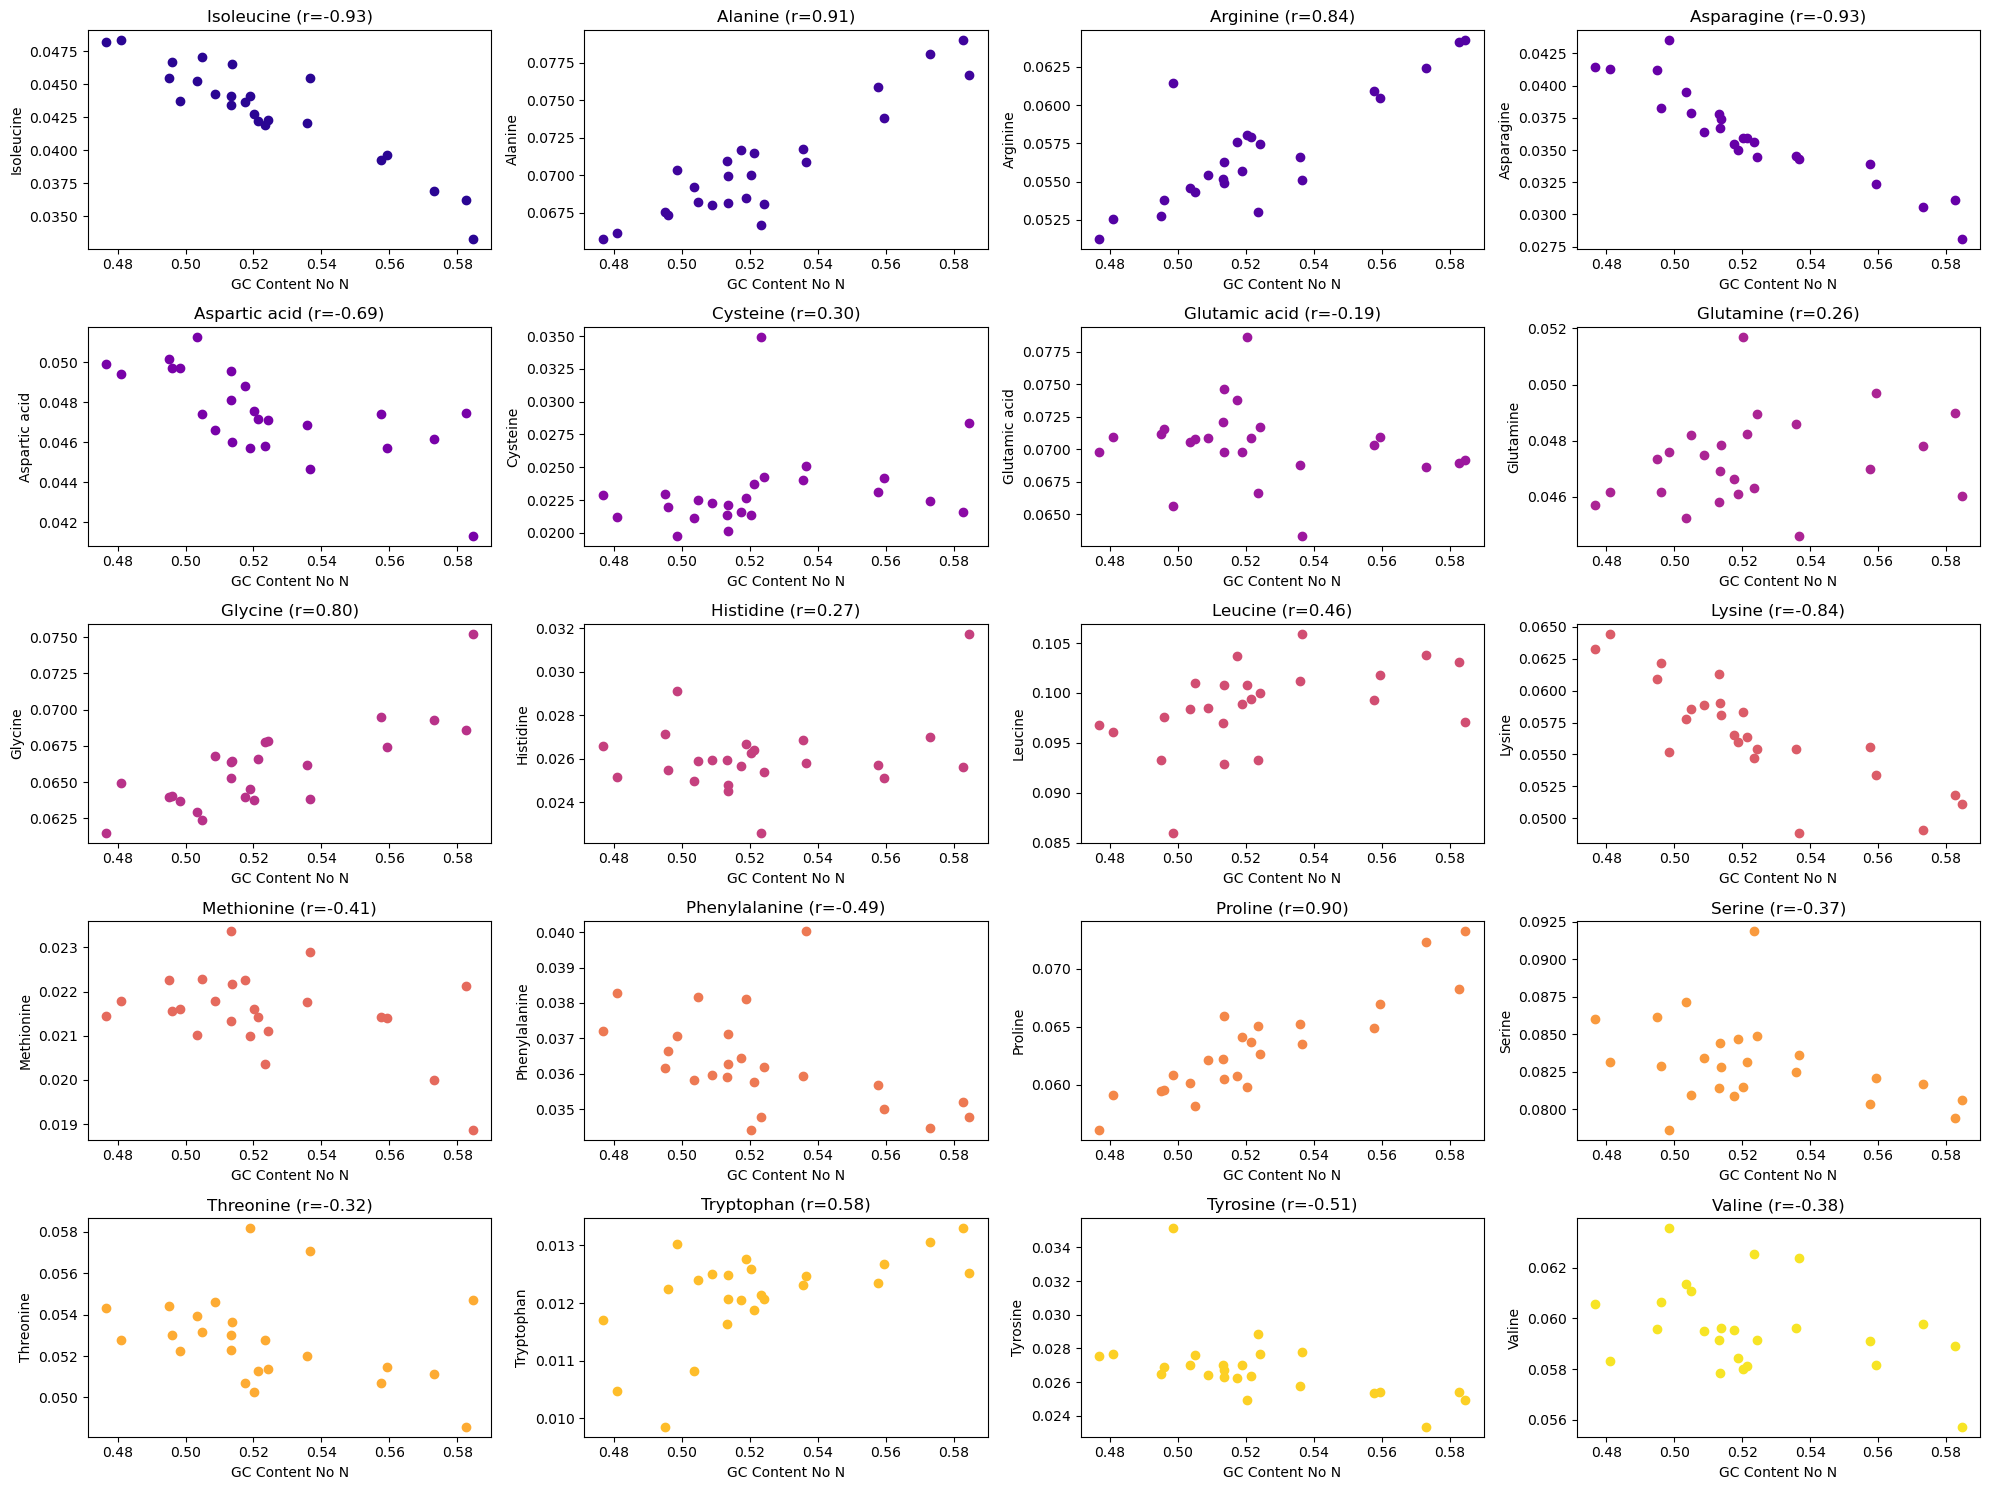

In [68]:
# The GC content in each chromosome (the x variable is the same for all the amino acids):
# The GC content:
#CREATE THE X AXIS VARIABLE
x = CDS_Genome_Long_Sorted['GC_content_non']

# CREATE A LIST OF COLUMN HEADERS
# List of the amino acid percentage column names:
# The amino acids with their corresponding percentage columns:
amino_acid_names = [
    'Isoleucine_percentage',
    'Alanine_percentage',
    'Arginine_percentage',
    'Asparagine_percentage',
    'Aspartic acid_percentage',
    'Cysteine_percentage',
    'Glutamic acid_percentage',
    'Glutamine_percentage',
    'Glycine_percentage',
    'Histidine_percentage',
    'Leucine_percentage',
    'Lysine_percentage',
    'Methionine_percentage',
    'Phenylalanine_percentage',
    'Proline_percentage',    'Serine_percentage',
    'Threonine_percentage',
    'Tryptophan_percentage',
    'Tyrosine_percentage',
    'Valine_percentage'
]
num_amino_acids = len(amino_acid_names)
# CREATE FIGURES AND AXES
# plt.subplots is part of the pyplot module.
# FIG is an object, a container for the plots.
# AXES is an array of Axes objects, where each Axes represents a single subplot.
fig, axes = plt.subplots(5, 4, figsize=(20, 15))  # Adjust the number of rows/columns as needed
axes = axes.flatten() # Flatten (make array of subplots a 1D array instead of 2D) to easily index each subplot (will not run without this) #useful in subplots for iterating through
palette = sns.color_palette("plasma", num_amino_acids)  #Get the colors for the plots # Set a Seaborn color palette

# PLOT THE SCATTERPLOTS ON EACH SUBPLOT:
# 1. For each item in amino acid names (above), pull the 
# amino acid percentages from that column and assign it to the variable y.

# we index each amino acid (e.g., [0] is Isoleucine), which will be referred to to create each subplot
# enumerate() generates pairs of values 
for i, amino_acid in enumerate(amino_acid_names):
    y = CDS_Genome_Long_Sorted[amino_acid]
   
    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(x, y)
    
    axes[i].scatter(x, y, color = palette[i])
    axes[i].set_xlabel('GC Content No N')
    axes[i].set_ylabel(amino_acid.replace('_percentage', ''))  # Clean up label for display
    axes[i].set_title(f'{amino_acid.replace("_percentage", "")} (r={correlation:.2f})')   # Set title for each plot


plt.tight_layout()
plt.show()

# Visually, GC content in the coding DNA (Ns removed) was more strongly associated with some aminos acids than others:
# 1. Strongest postive (as GC content increases in the coding sequence, amino acid content increases): 
#        *Alanine*
#        Pearson r = 0.91
#        Codons: GCT, GCC, GCA, GCG
# 2. Strongest negative (as GC content increases in the coding sequence, amino acid content decreases): 
#        *Isoleucine* 
#        Pearson r = -0.93 
#        Codons: ATT, ATC, ATA

# Figure 4. GC content in whole genome DNA, across all chromosomes, x 20 amino acids

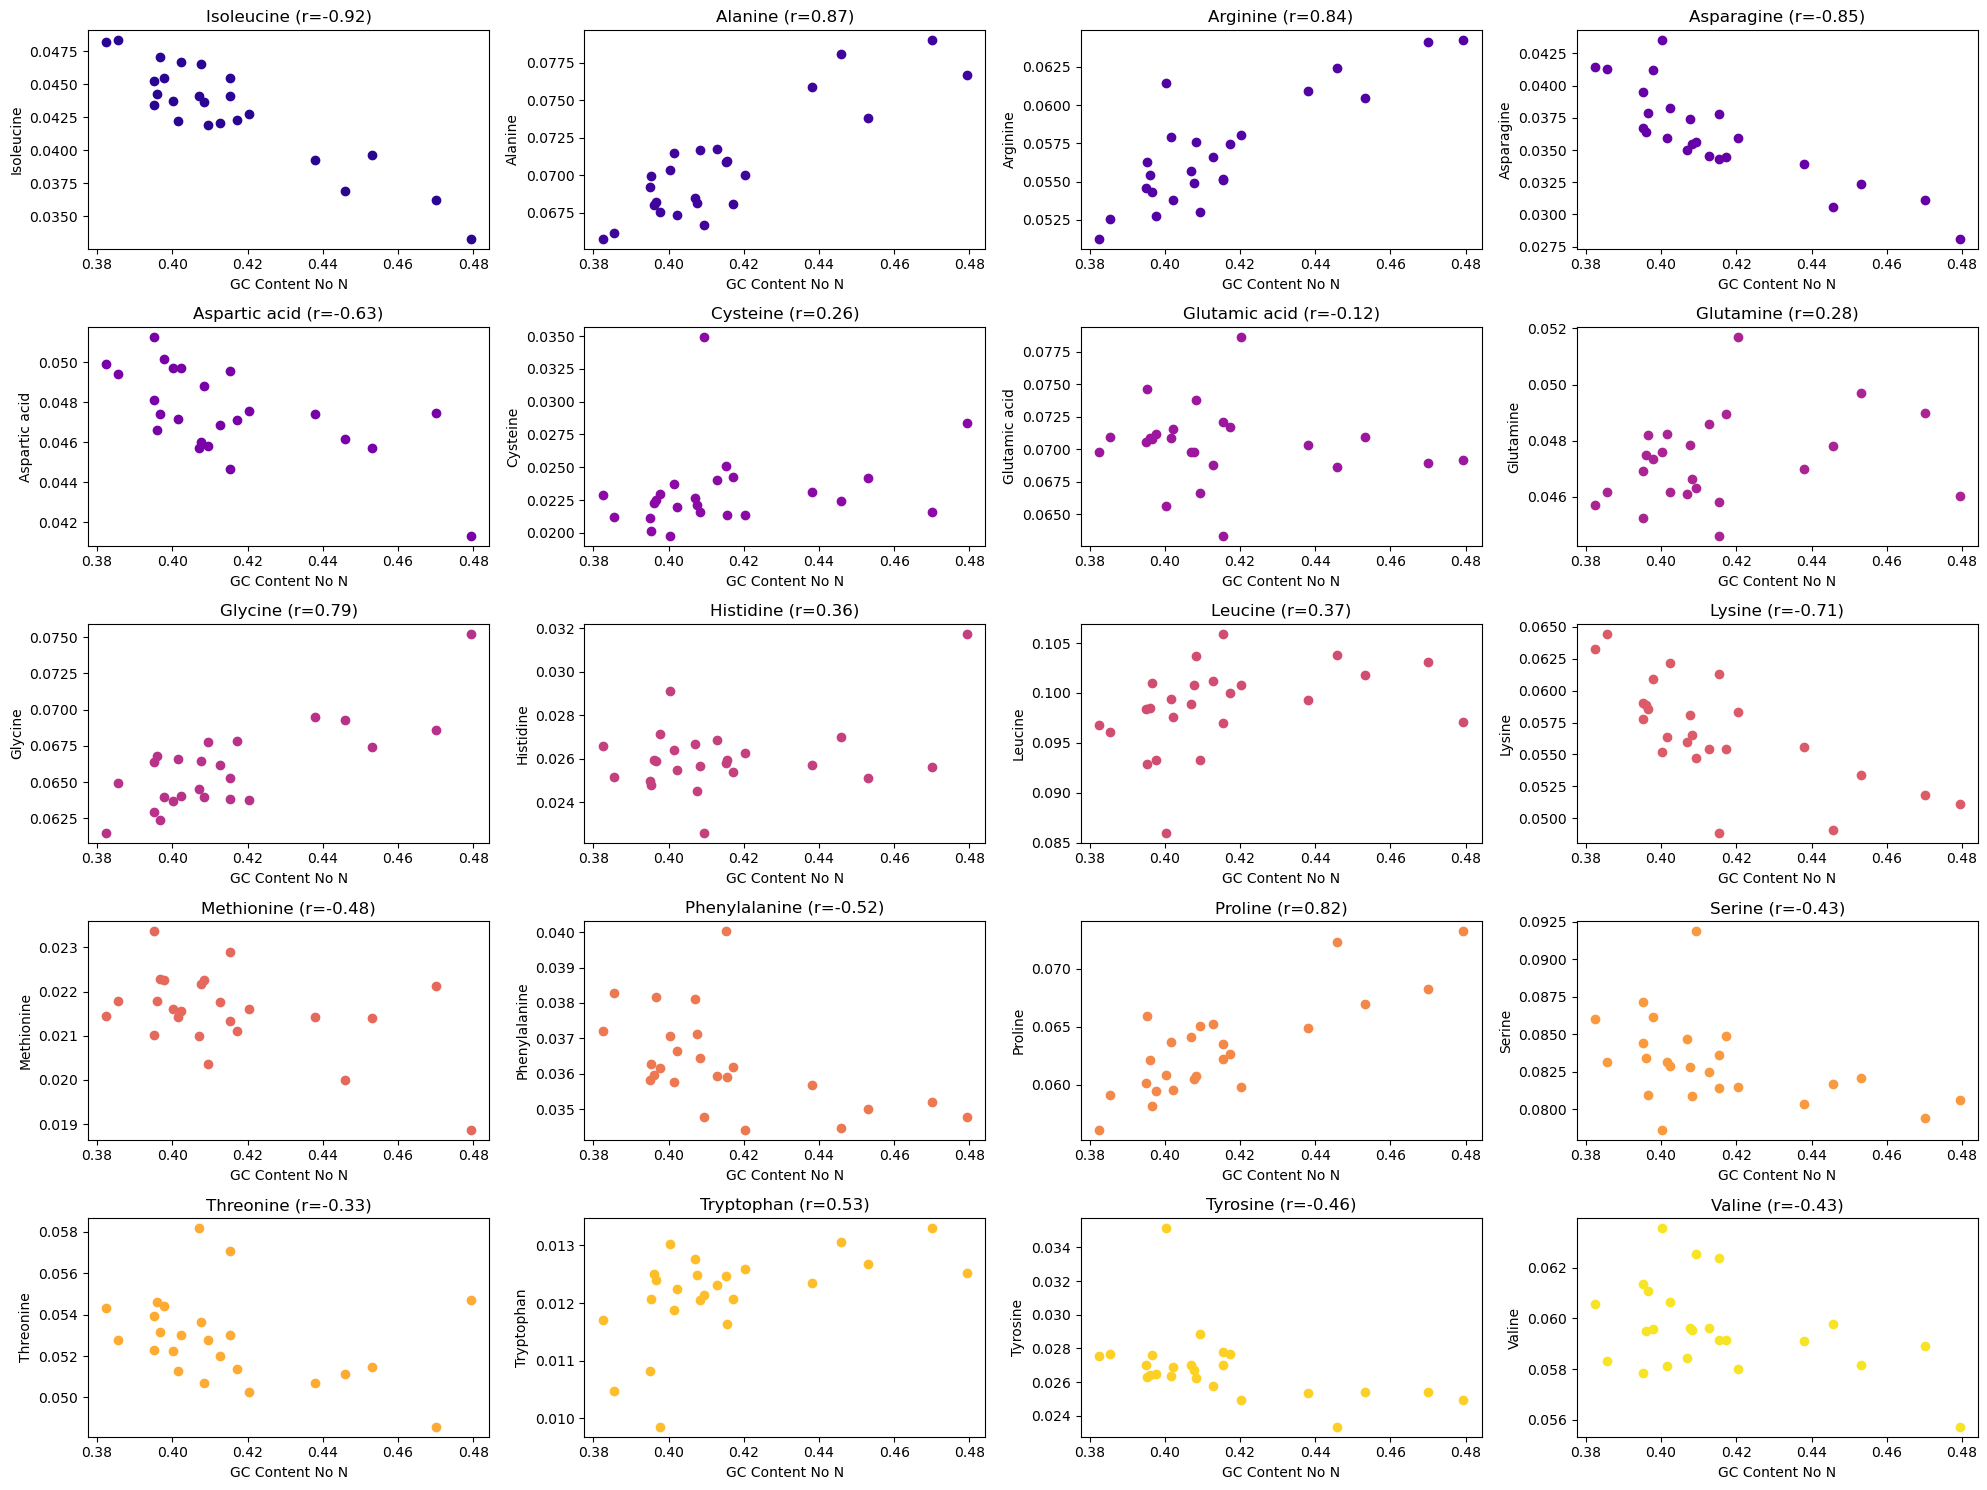

In [69]:
# The GC content in each chromosome (the x variable is the same for all the amino acids):
x3 = Whole_Genome_Long_Sorted['GC_content_non']

# List of the amino acid percentage column names:
amino_acid_names = [
    'Isoleucine_percentage',
    'Alanine_percentage',
    'Arginine_percentage',
    'Asparagine_percentage',
    'Aspartic acid_percentage',
    'Cysteine_percentage',
    'Glutamic acid_percentage',
    'Glutamine_percentage',
    'Glycine_percentage',
    'Histidine_percentage',
    'Leucine_percentage',
    'Lysine_percentage',
    'Methionine_percentage',
    'Phenylalanine_percentage',
    'Proline_percentage',    
    'Serine_percentage',
    'Threonine_percentage',
    'Tryptophan_percentage',
    'Tyrosine_percentage',
    'Valine_percentage'
]
num_amino_acids = len(amino_acid_names)
# Create a figure and axes
fig, axes = plt.subplots(5, 4, figsize=(20, 15))  # Adjust the number of rows/columns as needed
palette = sns.color_palette("plasma", num_amino_acids)  # Set the color palette
axes = axes.flatten()  # Flatten to easily index each subplot (will not run without this)

# PLOT THE SCATTERPLOTS ON EACH SUBPLOT:
# 1. For each item in amino acid names (above), pull the 
# amino acid percentages from that column and assign it to the variable y.

# we index each amino acid (e.g., [0] is Isoleucine), which will be referred to to create each subplot
# enumerate() generates pairs of values 
for i, amino_acid in enumerate(amino_acid_names):
    y = CDS_Genome_Long_Sorted[amino_acid]
    
    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(x3, y)
    
    axes[i].scatter(x3, y, color = palette[i])
    axes[i].set_xlabel('GC Content No N')
    axes[i].set_ylabel(amino_acid.replace('_percentage', ''))  # Clean up label for display
    axes[i].set_title(f'{amino_acid.replace("_percentage", "")} (r={correlation:.2f})')   # Set title for each plot


plt.tight_layout()
plt.show()

In [70]:
#enumerate(amino_acid_names)

In [71]:
x3
amino_acid_names

['Isoleucine_percentage',
 'Alanine_percentage',
 'Arginine_percentage',
 'Asparagine_percentage',
 'Aspartic acid_percentage',
 'Cysteine_percentage',
 'Glutamic acid_percentage',
 'Glutamine_percentage',
 'Glycine_percentage',
 'Histidine_percentage',
 'Leucine_percentage',
 'Lysine_percentage',
 'Methionine_percentage',
 'Phenylalanine_percentage',
 'Proline_percentage',
 'Serine_percentage',
 'Threonine_percentage',
 'Tryptophan_percentage',
 'Tyrosine_percentage',
 'Valine_percentage']

# Visually, GC content in the whole genome DNA (Ns removed) was more strongly associated with some aminos acids than others:
# 1. Strongest postive (as GC content increases in the coding sequence, amino acid content increases): 
#        *Alanine*
#        Pearson r = 0.87
#        Codons: GCT, GCC, GCA, GCG
# 2. Strongest negative (as GC content increases in the coding sequence, amino acid content decreases): 
#        *Isoleucine* 
#        Pearson r = -0.92 
#        Codons: ATT, ATC, ATA

# Part IX: Conclusions

# Challenges:
# 1. Importing dictionaries from .py file (answer: pickle!)
# 2. Renaming columns that are actually indexes
# 3. Creating multiple bar graphs (very modular)
# 4. Multi-panel scatterplots (more complexity)
# 5. Pandas and Matplotlib are new material

# Next steps:
# Add error bars to plots, statistical analyses